<a href="https://colab.research.google.com/github/juampi20/artificial-intelligence-2022/blob/master/hackaton_ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hackaton IA 2022

En este problema, traigo un dataset en el que podremos trabajar con una Regresion Lineal Multiple y Clasificación.

[Fish market](https://www.kaggle.com/datasets/aungpyaeap/fish-market)

**Regresion Lineal Multiple:** vamos a queremos averiguar el peso del pescado teniendo en cuenta las demás caracteristicas.

**Clasificación:** vamos a tratar de averiguar la especie del pescado.

## Regresion Lineal Multiple

In [507]:
# Descargamos el dataset
!wget https://raw.githubusercontent.com/juampi20/artificial-intelligence-2022/master/datasets/fish.csv -O fish.csv

--2022-11-04 23:07:31--  https://raw.githubusercontent.com/juampi20/artificial-intelligence-2022/master/datasets/fish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6022 (5.9K) [text/plain]
Saving to: ‘fish.csv’

fish.csv            100%[===================>]   5.88K  --.-KB/s    in 0s      

2022-11-04 23:07:31 (56.8 MB/s) - ‘fish.csv’ saved [6022/6022]



In [508]:
import os
import pandas as pd # data processing, CSV files.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### 1. Analizamos el dataset

In [509]:
data = pd.read_csv('fish.csv')
df = data.copy()
df.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
140,Pike,950.0,48.3,51.7,55.1,8.9262,6.1712
70,Parkki,273.0,23.0,25.0,28.0,11.0880,4.1440
56,Whitefish,270.0,24.1,26.5,29.3,8.1454,4.2485
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
68,Parkki,145.0,19.8,21.5,24.1,9.7364,3.1571
23,Bream,680.0,31.8,35.0,40.6,15.4686,6.1306
16,Bream,700.0,30.4,33.0,38.3,14.8604,5.2854
150,Smelt,8.7,10.8,11.3,12.6,1.9782,1.2852
12,Bream,500.0,29.1,31.5,36.4,13.7592,4.3680


**Significado de las columnas:**
- Species: Nombre de la especie del pescado.
- Weight: Peso del pescado en gramos.
- Length1: Longitud verticual en cm.
- Length2: Longitud diagonal en cm.
- Length3: Longitud transversal en cm.
- Height: Altura en cm.
- Width: Ancho en cm.

Nuestra variable dependiente será `weight`. Las variables independientes serán `species`, las diferentes longitudes, `height` y `width`.

In [510]:
print(str('Hay algun valor vacio en el dataset: '), df.isnull().values.any())

Hay algun valor vacio en el dataset:  False


In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


**Correlacion de las variables**:

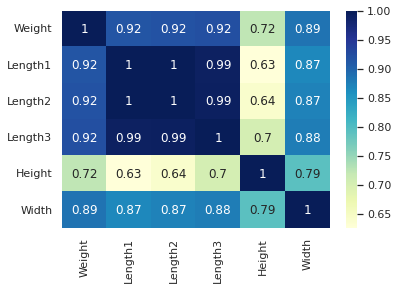

In [512]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');

**Estadisticas Basicas del dataset:**

In [513]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


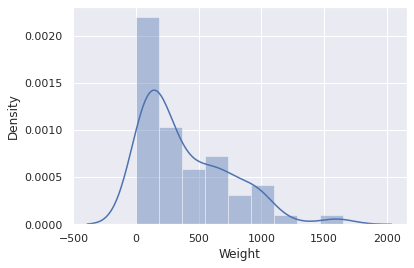

In [514]:
sns.distplot(df["Weight"])
plt.show()

**Limpiamos un poco los valores atipicos**

In [515]:
df = df[df["Weight"] < 1000]
df = df[df["Weight"] > 50 ]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


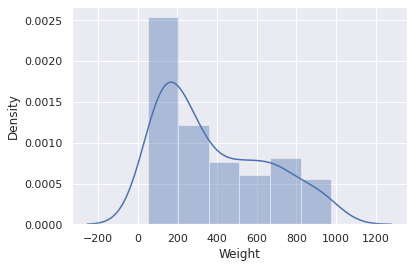

In [516]:
sns.distplot(df["Weight"])
plt.show()

### 2. Preparamos el modelo

**Elegimos las variables:**

In [517]:
X = df[['Length1','Length2','Length3','Height','Width']].to_numpy()
y = df['Weight'].to_numpy()

In [518]:
# Observamos el formato, la cantidad de datos que hay en cada variable y 5 ejemplos de cada variable
print(f"X ('Length1','Length2','Length3','Height','Width') tiene la forma: {X.shape} | posee cantidad de datos: {len(X)} | 5 ejemplos se ven así: {X[:5]}\n")
print(f"Y ('Weight'') tiene la forma: {y.shape} | posee cantidad de datos: {len(y)} | 5 ejemplos se ven así: {y[:5]}")

X ('Length1','Length2','Length3','Height','Width') tiene la forma: (128, 5) | posee cantidad de datos: 128 | 5 ejemplos se ven así: [[23.2    25.4    30.     11.52    4.02  ]
 [24.     26.3    31.2    12.48    4.3056]
 [23.9    26.5    31.1    12.3778  4.6961]
 [26.3    29.     33.5    12.73    4.4555]
 [26.5    29.     34.     12.444   5.134 ]]

Y ('Weight'') tiene la forma: (128,) | posee cantidad de datos: 128 | 5 ejemplos se ven así: [242. 290. 340. 363. 430.]


In [519]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

### 3. Entrenamos el modelo de regresion

In [520]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [521]:
reg.fit(Xtrain,ytrain)

LinearRegression()

In [522]:
print(f"Coeficientes del modelo: {reg.coef_}")
print(f"Intercepto del modelo: {reg.intercept_}")

Coeficientes del modelo: [  2.11714017  43.53568659 -29.33762236  34.19411868  57.67198625]
Intercepto del modelo: -591.5069182950374


### 4. Evaluamos el modelo final

In [523]:
# Ahora miramos el R2 usando la función score del modelo entrenado
print(f"Valor de métrica R2 con el conjunto de entrenamiento: {reg.score(Xtrain,ytrain)}")
print(f"Valor de métrica R2 con el conjunto de testeo: {reg.score(Xtest,ytest)}")

Valor de métrica R2 con el conjunto de entrenamiento: 0.953091092844438
Valor de métrica R2 con el conjunto de testeo: 0.9630079710689341


> **Obervacion:** Nos da un valor de bondad de ajuste alto, por lo cual podemos decir que el modelo es confiable.

In [524]:
# Calculamos predicciones para el conjunto de testeo y entrenamiento con la función .predict()
y_test_m_pred = reg.predict(Xtest)
y_train_m_pred = reg.predict(Xtrain) 
y_test_m_pred.shape, y_train_m_pred.shape

((32,), (96,))

In [525]:
y_test_m_pred1 = pd.DataFrame(y_test_m_pred, columns=['Estimated Weight'])
y_test1 = pd.DataFrame(ytest)
y_test1 = y_test1.reset_index(drop=True)
ynew = pd.concat([y_test1, y_test_m_pred1], axis=1)
ynew


,0,Estimated Weight
0,540.0,566.783885
1,150.0,99.832041
2,650.0,622.444846
3,925.0,906.350829
4,250.0,324.013288
5,800.0,684.046289
6,70.0,-16.968121
7,840.0,749.185070
8,130.0,131.406681
9,720.0,719.582857


### Realizamos una prediccion

In [526]:
df.head(1)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.52,4.02


In [527]:
# Creamos datos nuevos
X_prueba = np.array([[23.2, 25.4, 30.0, 11.52, 4.02]])

# Luego predecimos
y_pred = reg.predict(X_prueba)

# Observamos la salida
print(f"Predicción del modelo: {y_pred}")

Predicción del modelo: [309.0461341]


## Clasificacion

### Analizamos el dataset

In [528]:
data = pd.read_csv('fish.csv')
df = data.copy()
df.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
22,Bream,620.0,31.5,34.5,39.7,15.5227,5.2801
121,Perch,1015.0,37.0,40.0,42.4,12.3808,7.4624
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
20,Bream,575.0,31.3,34.0,39.5,15.1285,5.5695
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
21,Bream,685.0,31.4,34.0,39.2,15.9936,5.3704
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
101,Perch,218.0,25.0,26.5,28.0,7.1680,4.1440
35,Roach,40.0,12.9,14.1,16.2,4.1472,2.2680
117,Perch,650.0,36.5,39.0,41.4,11.1366,6.0030


In [529]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [530]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


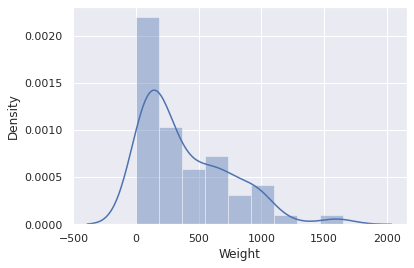

In [531]:
sns.distplot(df["Weight"])
plt.show()

**Limpiamos un poco los valores atipicos**

In [532]:
df = df[df["Weight"] < 1000]
df = df[df["Weight"] > 50 ]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


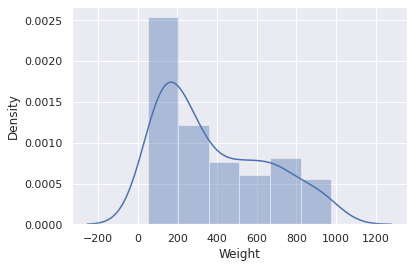

In [533]:
sns.distplot(df["Weight"])
plt.show()

**Contamos la cantidad de especies**

In [534]:
sp = df['Species'].value_counts()
sp = pd.DataFrame(sp)
sp.T

,Perch,Bream,Roach,Pike,Parkki,Whitefish
Species,47,34,18,13,11,5


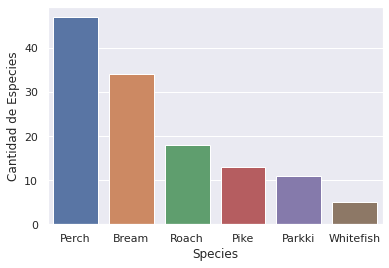

In [535]:
sns.barplot(x=sp.index, y=sp['Species']);
plt.xlabel('Species')
plt.ylabel('Cantidad de Especies')
plt.show()

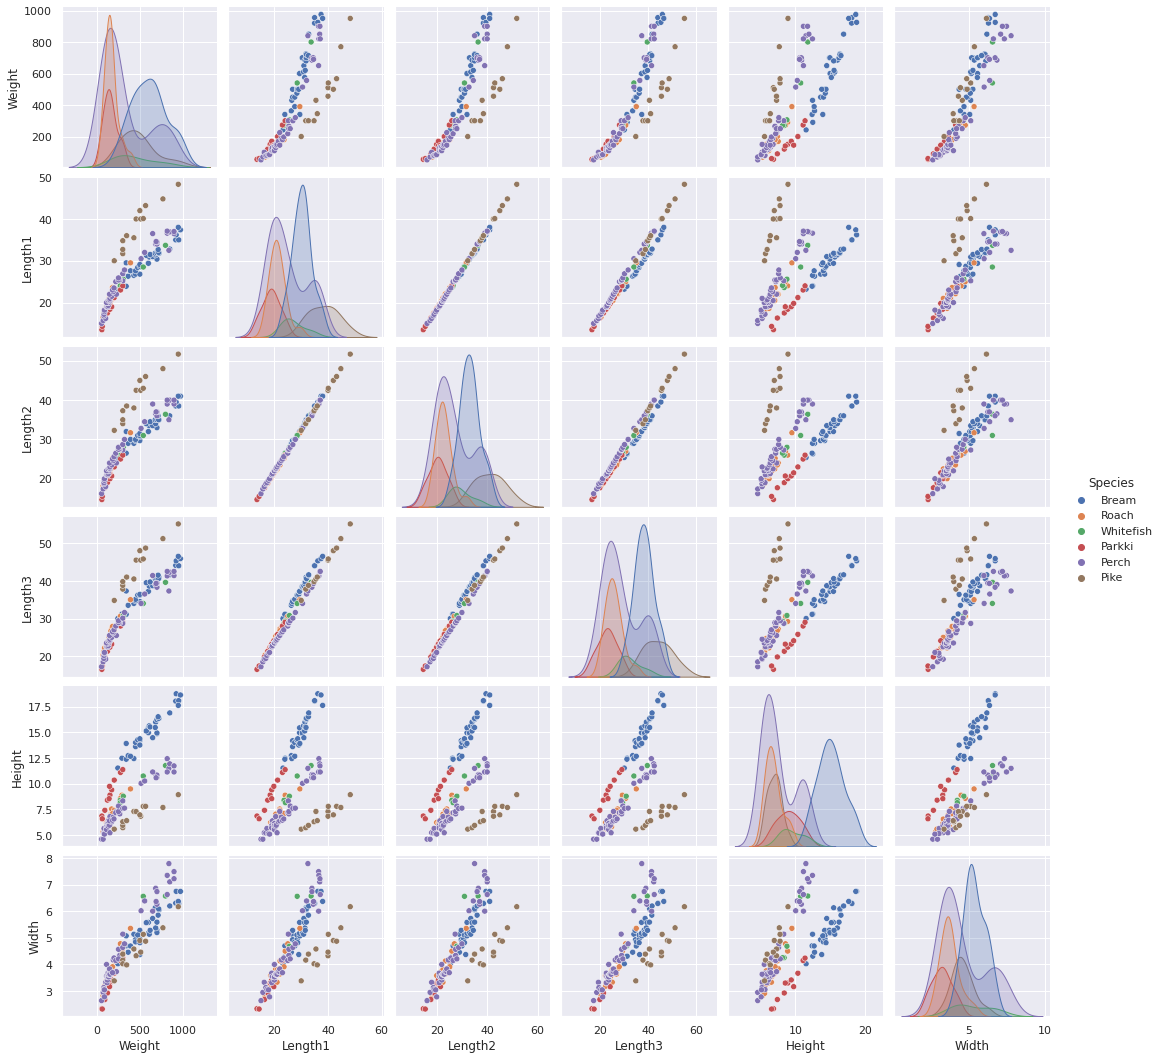

In [500]:
sns.pairplot(df, hue='Species');

### Armamos el dataset para entrenar

In [501]:
X = df.drop(columns='Species').to_numpy()
y = df['Species'].to_numpy()

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state=42)

print(f"Set de entenamiento: {Xtrain.shape}, {ytrain.shape}")
print(f"Set de testeo: {Xtest.shape}, {ytest.shape}")

Set de entenamiento: (96, 6), (96,)
Set de testeo: (32, 6), (32,)


### Entrenamos el modelo con Naive Bayes

In [502]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.preprocessing import MinMaxScaler
# model_naive = make_pipeline(MinMaxScaler(),MultinomialNB())
model_naive = make_pipeline(MinMaxScaler(),GaussianNB())
model_naive.fit(Xtrain,ytrain)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('gaussiannb', GaussianNB())])

### Evaluamos el modelo

In [503]:
print(f"R2 en entrenamiento: {model_naive.score(Xtrain,ytrain)}")
print(f"R2 en testeo: {model_naive.score(Xtest,ytest)}")

R2 en entrenamiento: 0.5520833333333334
R2 en testeo: 0.53125


In [504]:
from sklearn import metrics as ms
y_pred_naive = model_naive.predict(Xtest)
acc_naive = ms.accuracy_score(y_true = ytest, y_pred = y_pred_naive)
precision_naive = ms.precision_score(y_true = ytest, y_pred = y_pred_naive,zero_division=0, average='weighted')
recall_naive = ms.recall_score(y_true = ytest, y_pred = y_pred_naive,zero_division=0, average='weighted')
f1_naive = ms.f1_score(y_true = ytest, y_pred = y_pred_naive,zero_division=0, average='weighted')

naive_metrics = {"Accuracy":acc_naive,
                  "Precision":precision_naive,
                  "Recall":recall_naive,
                  "F1":f1_naive}
naive_metrics


{'Accuracy': 0.53125,
 'Precision': 0.35436698717948717,
 'Recall': 0.53125,
 'F1': 0.4146019820971867}

### Realizamos una predicción.

In [505]:
df.head(1)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.52,4.02


In [506]:
# Creamos datos nuevos
X_prueba = np.array([[242.0, 23.2, 25.4, 30.0, 11.52, 4.02]])

# Luego predecimos
y_pred = model_naive.predict(X_prueba)

# Observamos la salida
print(f"Predicción del modelo: {y_pred}")

Predicción del modelo: ['Perch']
